<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/wineskealearn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import scale

In [ ]:
df=load_wine(as_frame=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(data=df['data'],columns=df['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df.shape

(178, 13)

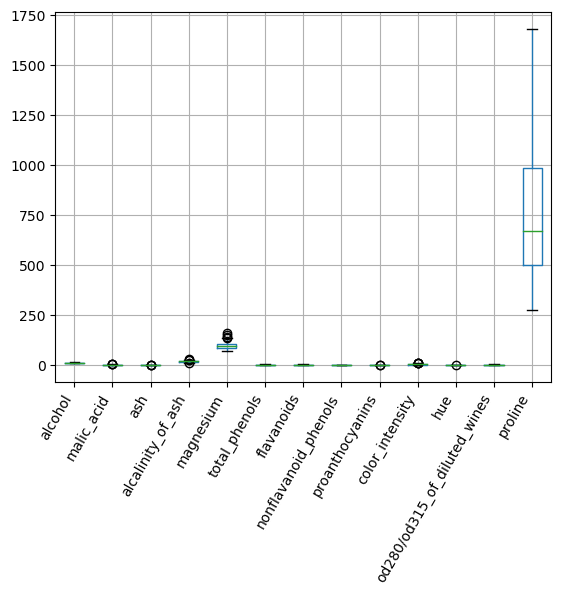

In [ ]:
# identificando outliers com BOXPLOT
df.boxplot()
plt.xticks(rotation=60, ha="right")
plt.show()



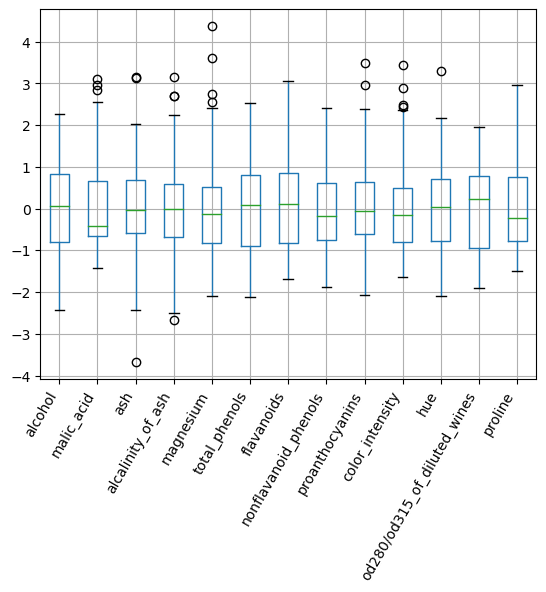

In [ ]:
#df.APPLY(SCALE-->SKLEARN) df, aplica scale para toda a tabela
df1=df.apply(scale)
df1.boxplot()
plt.xticks(rotation=60, ha="right")
plt.show()


Podemos indentificar os outliers pelo metodo interquantil, utilizando a formula:
lower_outlier=Q1-1.5 * IQR
upper_outlier=Q3+1.5 * IQR
Onde Q1 represente o primeiro quartil, Q3 o terceiro e IQR intervalo entre os quartil

In [ ]:
#funcao def outlier pega valor dentro de uma coluna do meu dataframe
# determino o q1 e q3, coloco uma array de numpy chamando a funcao .QUANTILE calculando os quantiles de .25 E .75
#o interquartil  seria a subtracao de o quarti 3 com o quartil 1
# fator podemos colocar caso seja mais afastado da nossa distribuicao colocamos o valor 3, caso para valores mais
#proxoimos da distribuicao 1.5
# determinando os UP_OUT seria o q3 determinado pelo np.quantile somando o (factor multiplicado pelo IQR(q3-q1))
#determinando os LOW_OUT seria o q3 determinado pelo np.quantile subtraindo o (factor multiplicado pelo IQR(q3-q1))
#retorna os valores do array LOWER E UPPER

def outliers(array, extreme=False ):

    q1,q3=np.quantile(array,[.25,.75])
    iqr=q3-q1
    factor=3. if extreme else 1.5
    upper_outlier = q3 + factor * iqr
    lower_outlier = q1 - factor * iqr
    return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
# mostrando aplicacao da funcao em uma coluna
outliers(df.ash)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59      True
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [ ]:
#calculando a suma dos outliers
outliers(df.ash).sum()

3

In [ ]:
#usando .APPLY( a minha formula) para aplicar a formula feita para todas as colunas do meu dataset
df1.apply(outliers).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
df1[~df1.apply(outliers).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
#remover outliers usando apply e a FUNCAO ANY() de padrao vem axis=0 coluna, axis=1 linha
dfwo=df1[~df1.apply(outliers).any(axis=1)]

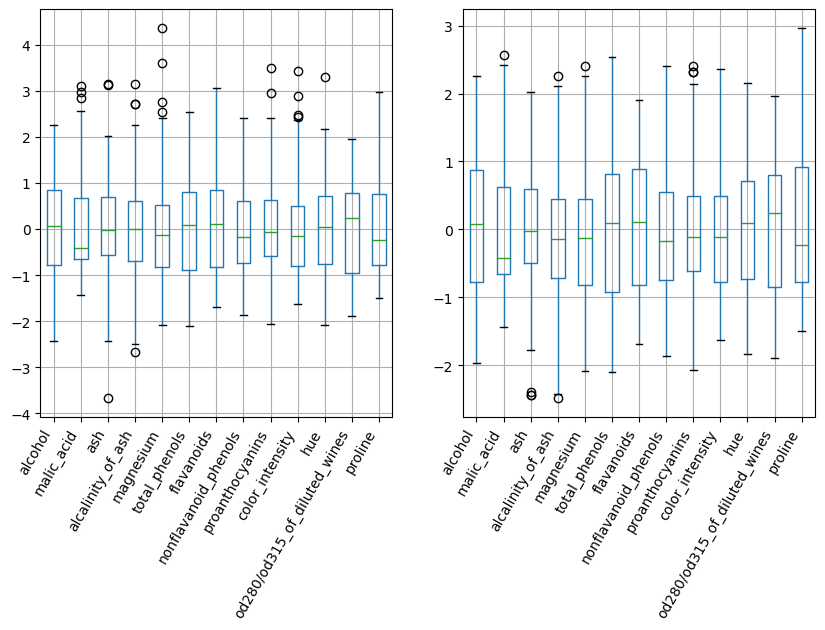

In [ ]:
#figura lado a lado
fig,axes=plt.subplots(ncols=2, figsize=(10,6))
df1.boxplot(ax=axes[0])
dfwo.boxplot(ax=axes[1])

fig.autofmt_xdate(rotation=60, ha="right")
plt.show()


# zscore

In [ ]:
df2=df.apply(scale)
df2.head()
df2.shape

(178, 13)

In [ ]:
#criando a funcao Zscore usando sklearn scale
def zscore(array):
    scaled_array=scale(array)
    return(scaled_array < - 3) | (scaled_array > 3)

dfwo1=df2[~df2.apply(zscore).any(axis=1)]
dfwo1



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
df.shape

(178, 13)

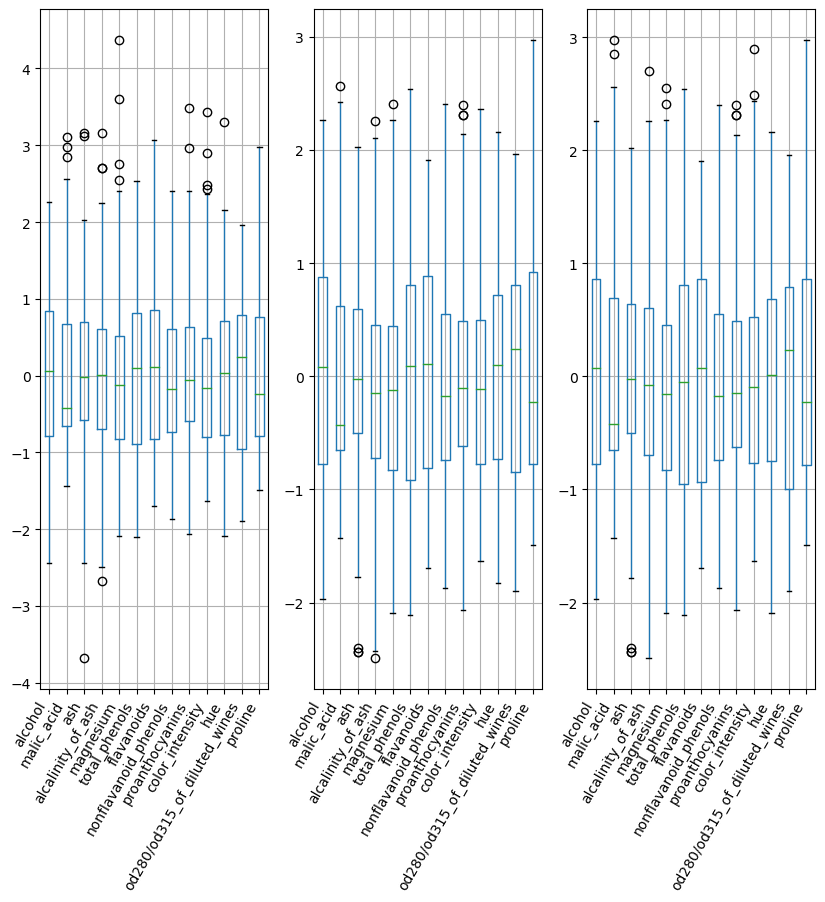

In [ ]:
fig,axes=plt.subplots(ncols=3, figsize=(10,10))
df1.boxplot(ax=axes[0])
dfwo.boxplot(ax=axes[1])
dfwo1.boxplot(ax=axes[2])
fig.autofmt_xdate(rotation=60, ha="right")
plt.show()

